In [1]:
import tensorflow as tf

/Users/ashishkarhade/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

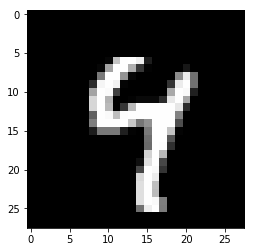

In [19]:
single_img = mnist.train.images[2].reshape(28,28)
plt.imshow(single_img, cmap='gist_gray')

In [28]:
#Placeholder x
x = tf.placeholder(tf.float32, shape=[None, 784])

In [29]:
# Variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [30]:
#Create graph functions
y = tf.matmul(x, W) + b

In [32]:
#Loss functions
y_true = tf.placeholder(tf.float32, shape=[None, 10])

cross_en = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [33]:
#optimizers
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_en)

In [34]:
#Create and run sessions
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y})
        
    #EVALUATE THE MODEL
    correct_pred = tf.equal(tf.argmax(y,1), tf.arg_max(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true: mnist.test.labels}))

0.9165


In [37]:
# PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])

In [38]:
#VARIABLES
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [43]:
#GRAPH FUNC
y_pred = tf.add(tf.matmul(x, W), b)

In [40]:
## LOSS
cross_en = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2())

In [41]:
# OPTIMIZERS

In [42]:
#SESSION